### Baseball Case Study

# 1. Import Necessary Libraries and Load Data
First, import the necessary libraries and load the data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Baseball/baseball.csv?raw=true'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


# 2. EDA (Exploratory Data Analysis)
2.1 Descriptive Statistics
Generate descriptive statistics to understand the data distribution:

In [2]:
print(data.describe())

                W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000

2.2 Check for Missing Values
Check for any missing values in the dataset:

In [3]:
print(data.isnull().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


2.3 Visualize the Distribution of Features
Visualize the distribution of each feature to understand its characteristics:

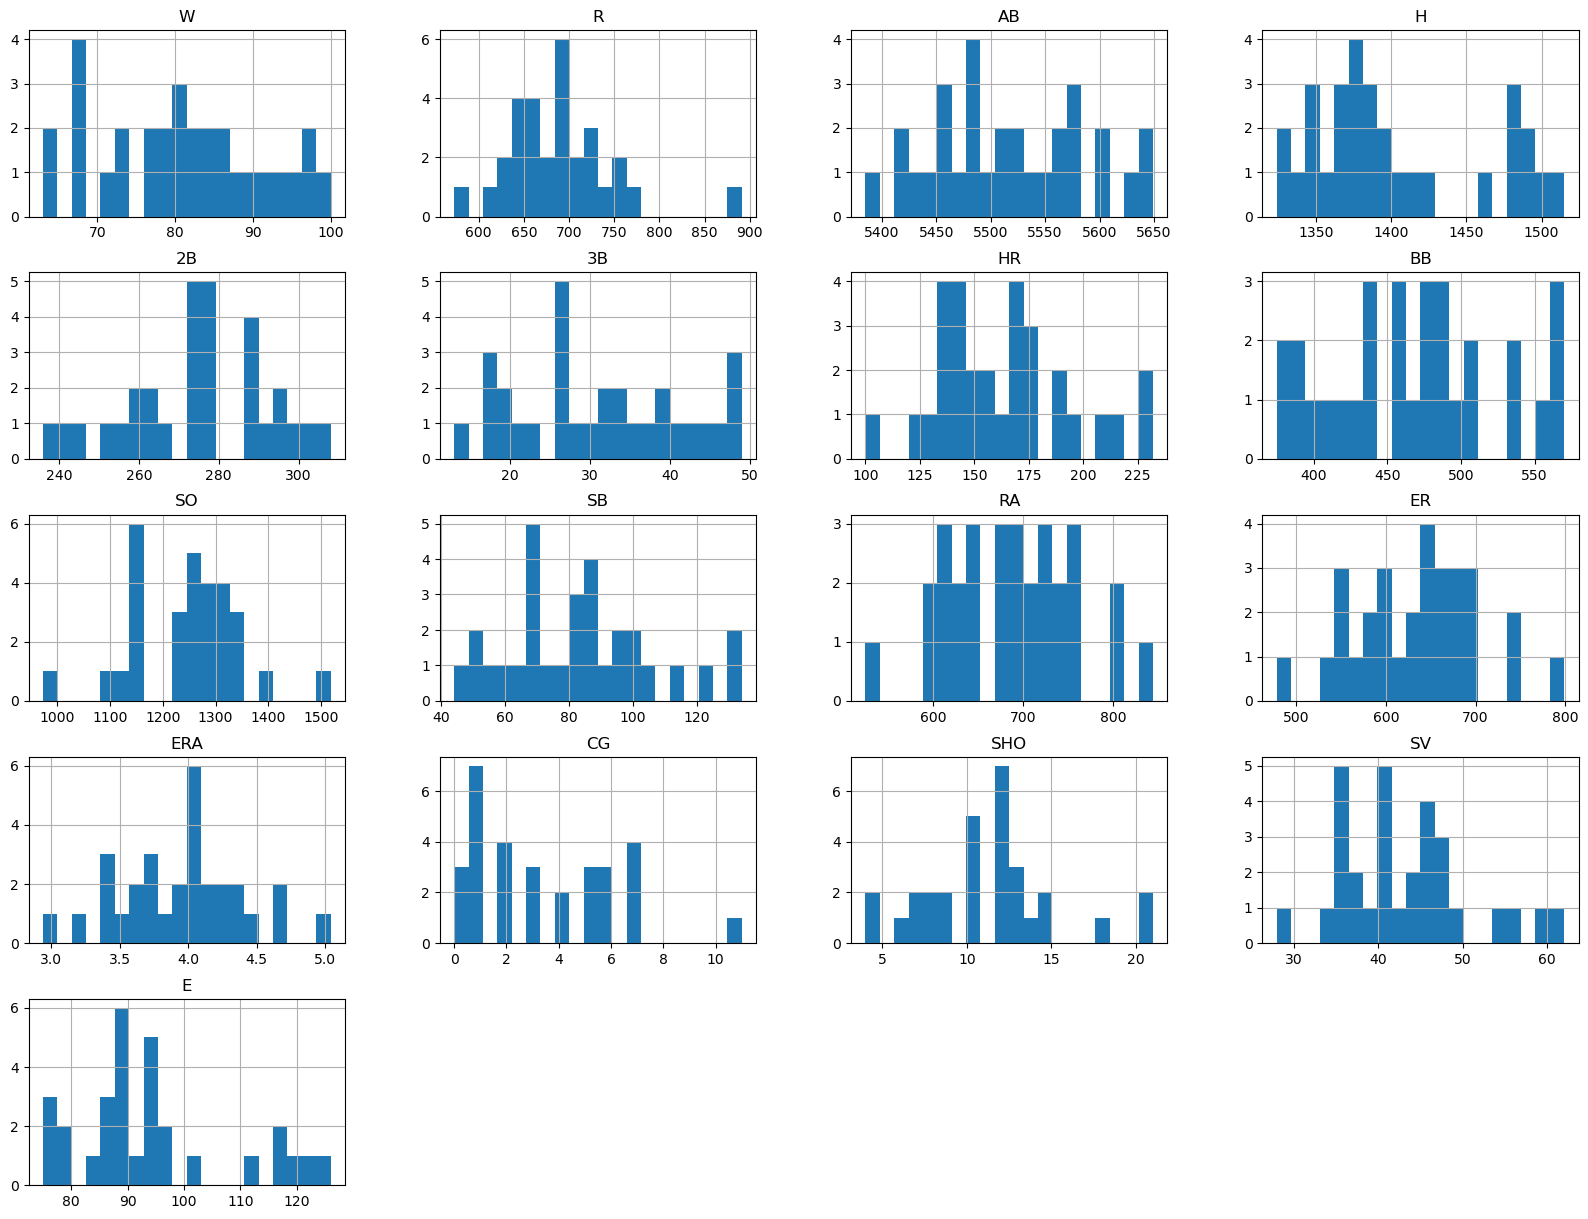

In [4]:
data.hist(bins=20, figsize=(20, 15))
plt.show()

2.4 Correlation Heatmap
Plot a heatmap to visualize the correlation between features:

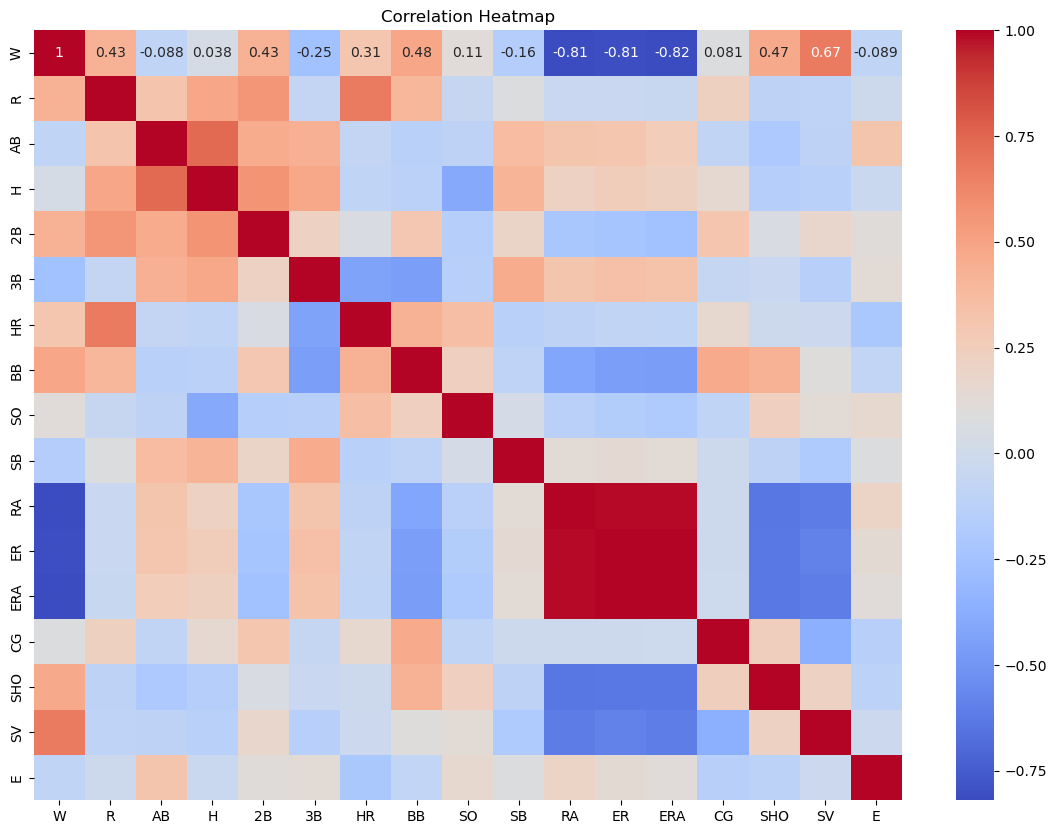

In [5]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 3. Data Preprocessing
3.1 Handle Missing Values
If there are any missing values, handle them appropriately (e.g., imputation or removal):

In [6]:
# Example: Dropping rows with missing values
data = data.dropna()

3.2 Feature Scaling
Standardize the features to bring them to a similar scale:

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('W', axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[1:])
scaled_data['W'] = data['W'].values

# 4. Feature Engineering
4.1 Create Additional Features
Create additional features if necessary. For instance, you could create interaction terms or polynomial features:

In [8]:
# Example: Creating interaction terms
scaled_data['HR_per_AB'] = scaled_data['HR'] / scaled_data['AB']
scaled_data['BB_per_SO'] = scaled_data['BB'] / scaled_data['SO']

# 5. Model Training and Evaluation

In [9]:
# Split the data into training and testing sets
X = scaled_data.drop('W', axis=1)
y = scaled_data['W']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 5.99666666666667
Root Mean Squared Error: 7.604069086131893


# 6. Feature Importance

      Feature  Importance
9          RA    0.232018
14         SV    0.143824
0           R    0.129294
10         ER    0.123388
11        ERA    0.116786
3          2B    0.051744
6          BB    0.028890
8          SB    0.025438
1          AB    0.021324
2           H    0.019269
13        SHO    0.018180
4          3B    0.017960
16  HR_per_AB    0.015669
15          E    0.015159
7          SO    0.012796
12         CG    0.012186
5          HR    0.008355
17  BB_per_SO    0.007719


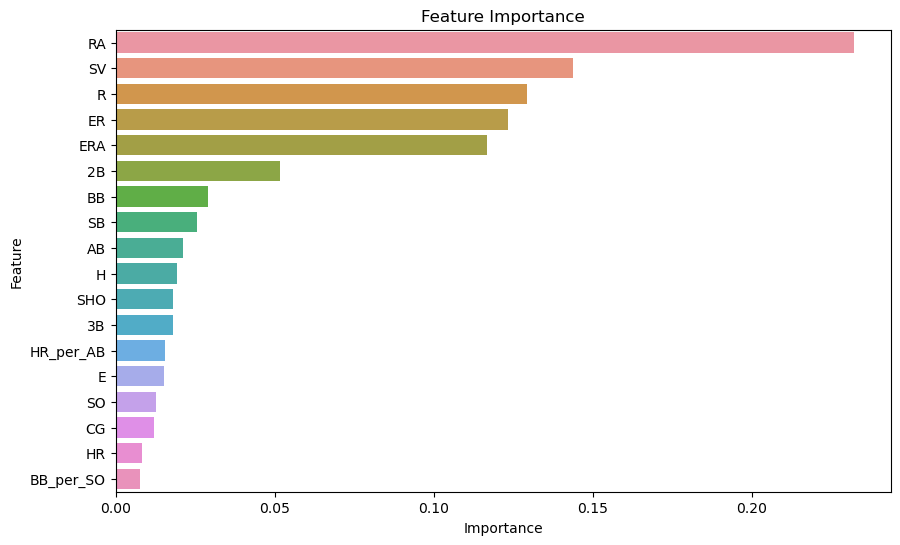

In [10]:
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()
